# Image Segmentation with Deep ConvNets (PyTorch)

Author: Caihao Cui

Lastest Update Time: 28-Mar-2021

Created Time: Sat 27-Mar-2021

This repo is on solving image segmentation task by building a convolutional neural network (UNet) to output a pixel-wise mask of the input image. 

The basic function will be like: $ Y_{H, W} = Model(X_{3, H, W})$ 
    
where $X$ is a RGB image, $Y$ is a mask image with interger represent one type of objects.  

Find more background on the [README.md](README.md)


TOC: 
1. Data Review
2. Sample Preparation
3. Build Model
4. Manage Model
5. Prediction 
6. TBC.

# Data_Review 
- Check the data set size and create interim and processed data.
    - df_train
    - df_valid
    - df_test
    - df_label
- Find errors of the image pairs. 

In [1]:
%%bash
conda list | grep pytorch

# conda create -n py38 python=3.8.3
# conda activate py38
# pip install requirements.txt

pytorch                   1.7.0                   py3.8_0    pytorch
torchaudio                0.7.0                      py38    pytorch
torchvision               0.8.1                  py38_cpu    pytorch


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# data dir / types
raw_data_dir =  "./data/raw"
intrim_data_dir =  "./data/interim"
processed_data_dir = "./data/processed"

# images to build model
image_dir = raw_data_dir +"/train/images"
mask_dir = raw_data_dir + "/train/masks"
labels_path = raw_data_dir+"/labels.txt"

# image to test model without mask
test_dir = "data/raw/test/images"

In [4]:
# from SegNet.data.review import get_imagepair_lists, get_label_names, get_imagepair_df_basic
# from SegNet.data.review import save_df
# from SegNet.data.review import get_image_list, get_rgb_image_df_basic
# from SegNet.data.review import get_train_valid_split
from SegNet.data.review import data_review, label_review

In [5]:
## create the dataframe for training, validaiton and test
# df_train, df_valid, df_test = data_review(image_dir, mask_dir, intrim_data_dir, processed_data_dir, test_dir)

In [6]:
!tree -L 2 data/

data/
├── external
├── interim
│   ├── df_data.csv
│   └── df_data.csv.backup
├── processed
│   ├── df_label.csv
│   ├── df_label.csv.backup
│   ├── df_test.csv
│   ├── df_test.csv.backup
│   ├── df_train.csv
│   ├── df_train.csv.backup
│   ├── df_valid.csv
│   └── df_valid.csv.backup
└── raw
    ├── labels.txt
    ├── test
    └── train

6 directories, 11 files


In [7]:
import pandas as pd
df_train_path = "data/processed/df_train.csv"
df_valid_path = "data/processed/df_valid.csv"
df_test_path = "data/processed/df_test.csv"
df_train = pd.read_csv(df_train_path)
df_valid = pd.read_csv(df_valid_path)
df_test = pd.read_csv(df_test_path)
df_train.head(10)

img_rgb                      img_mask  label_min  \
0  data/raw/train/images/322.jpg  data/raw/train/masks/322.png          0   
1  data/raw/train/images/461.jpg  data/raw/train/masks/461.png          0   
2  data/raw/train/images/016.jpg  data/raw/train/masks/016.png          0   
3  data/raw/train/images/103.jpg  data/raw/train/masks/103.png          0   
4  data/raw/train/images/514.jpg  data/raw/train/masks/514.png          0   
5  data/raw/train/images/174.jpg  data/raw/train/masks/174.png          0   
6  data/raw/train/images/176.jpg  data/raw/train/masks/176.png          0   
7  data/raw/train/images/228.jpg  data/raw/train/masks/228.png          0   
8  data/raw/train/images/342.jpg  data/raw/train/masks/342.png          0   
9  data/raw/train/images/382.jpg  data/raw/train/masks/382.png          0   

   label_max  label_unique                                      label_id_list  
0         22            22  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 ...  
1         22            22  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 ...  
2         22            19  [ 0  1  2  3  4  5  7  8  9 10 11 13 14 15 18 ...  
3         22            19  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 ...  
4         22            19  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 15 17 ...  
5         22            18  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 19 ...  
6         22            18  [ 0  1  2  3  4  5  6  8  9 10 11 13 14 15 17 ...  
7         22            18  [ 0  1  2  3  4  5  6  8  9 10 11 13 14 15 17 ...  
8         22            18  [ 0  1  2  3  4  5  7  8  9 10 11 13 14 15 16 ...  
9         22            18  [ 0  1  2  3  4  5  6  8  9 10 11 13 14 15 18 ...

In [8]:
df_test.head()

img_name  height  width  channel
0  data/raw/test/images/591.jpg    4000   6000        3
1  data/raw/test/images/585.jpg    4000   6000        3
2  data/raw/test/images/584.jpg    4000   6000        3
3  data/raw/test/images/564.jpg    4000   6000        3
4  data/raw/test/images/559.jpg    4000   6000        3

In [9]:
# read the label names
top_label_id = df_train['label_max'].max()
df_label  = label_review(labels_path, top_label_id, processed_data_dir)
label_names = df_label['label_name'].to_list()
# label_names # show label names

2021/03/28 20:23:52-INFO - Get label names from ./data/raw/labels.txt
2021/03/28 20:23:52-INFO - 3 label names are missing!
2021/03/28 20:23:52-INFO - Save dataframe data/processed/df_label.csv


In [10]:
# len(df_train['label_id_list'][0].strip('[]').split())
# df_train['label_id_list'][0]

## Sample Visulization
Pick a few image to see the RGB and MASK

In [11]:
%%bash
tree SegNet/ 

SegNet/
├── __init__.py
├── __pycache__
│   └── __init__.cpython-38.pyc
├── data
│   ├── __init__.py
│   ├── __pycache__
│   │   ├── __init__.cpython-38.pyc
│   │   ├── dataset.cpython-38.pyc
│   │   └── review.cpython-38.pyc
│   ├── dataset.py
│   ├── make_dataset.py
│   └── review.py
├── features
│   ├── __init__.py
│   ├── __pycache__
│   │   ├── __init__.cpython-38.pyc
│   │   └── build_features.cpython-38-pytest-6.1.1.pyc
│   └── build_features.py
├── models
│   ├── __init__.py
│   ├── __pycache__
│   │   ├── __init__.cpython-38.pyc
│   │   ├── dice_loss.cpython-38.pyc
│   │   ├── train_model.cpython-38.pyc
│   │   └── unet.cpython-38.pyc
│   ├── dice_loss.py
│   └── unet.py
└── visualization
    ├── __init__.py
    ├── __pycache__
    │   ├── __init__.cpython-38.pyc
    │   └── visualize.cpython-38.pyc
    └── visualize.py

9 directories, 24 files


In [12]:
img_file_name, mask_file_name =  df_train['img_rgb'][0], df_train['img_mask'][0]
img_file_name, mask_file_name

('data/raw/train/images/322.jpg', 'data/raw/train/masks/322.png')

In [13]:
from SegNet.visualization.visualize import pil_read, plot_image_pair, plot_imageoverlay

In [14]:
img, mask = pil_read(img_file_name, mask_file_name)
print(img.format, img.size, img.mode)
print(mask.format, mask.size, mask.mode)

None (6000, 4000) RGB
None (6000, 4000) L


2021/03/28 20:23:56-INFO - Save imagepair at reports/figures/image_pair_gray.png


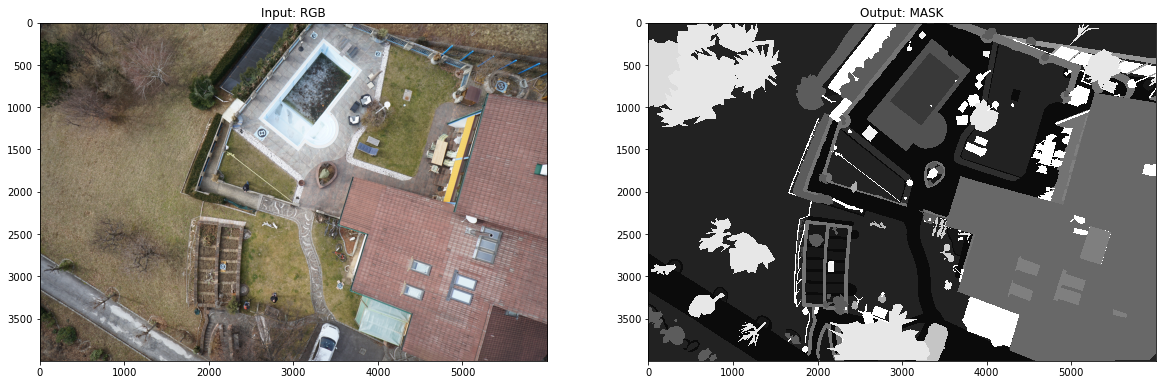

'reports/figures/image_pair_gray.png'

In [15]:
plot_image_pair(img, mask,label_names)

2021/03/28 20:24:02-INFO - Save imagepair at reports/figures/image_pair_jet.png


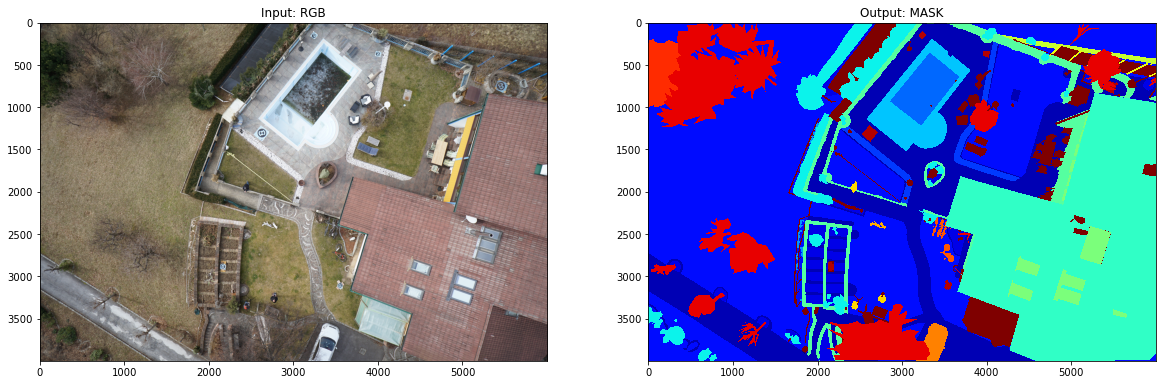

'reports/figures/image_pair_jet.png'

In [16]:
plot_image_pair(img, mask, label_names, cmap='jet')

2021/03/28 20:24:11-INFO - Save imageoverlay at reports/figures/sample.png


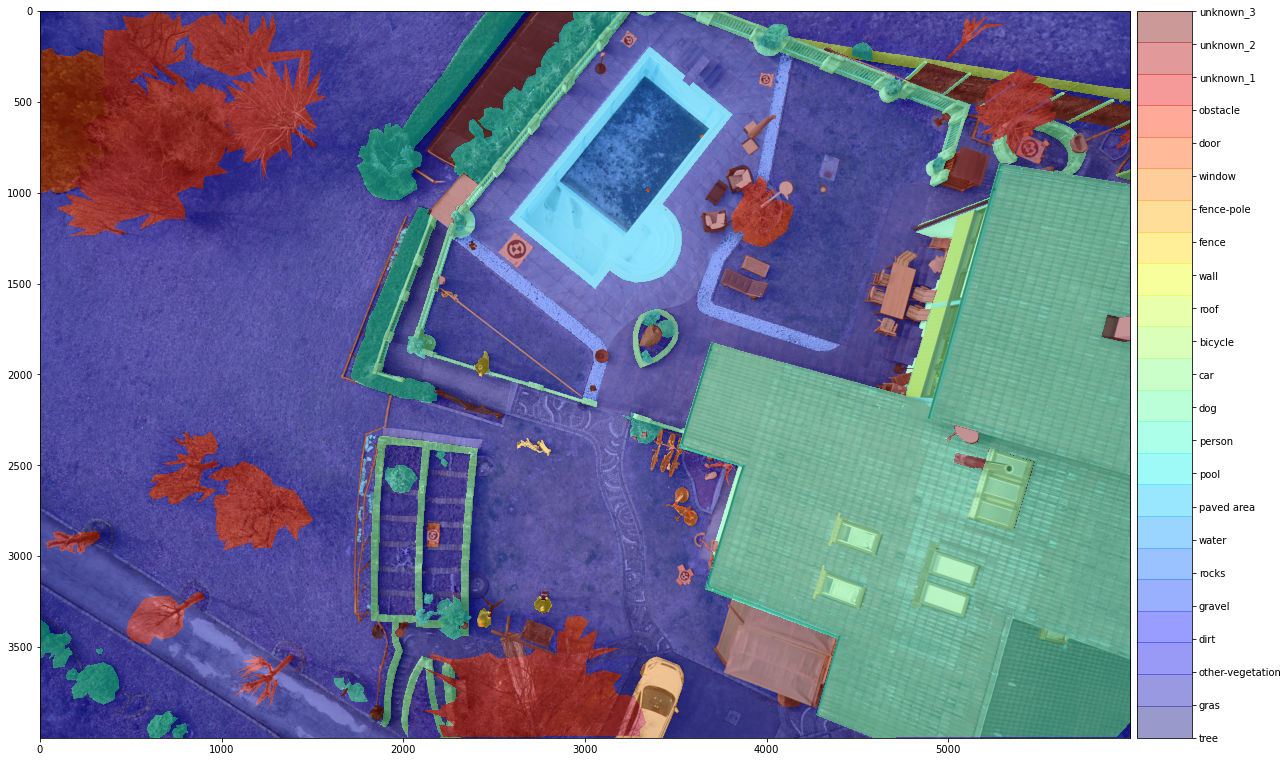

'reports/figures/sample.png'

In [17]:
plot_imageoverlay(img, mask, label_names, cmap='jet')

## Build Model

- Check the DataLoader 
- Bulid the model in Command Line

In [18]:
df_train.head()

img_rgb                      img_mask  label_min  \
0  data/raw/train/images/322.jpg  data/raw/train/masks/322.png          0   
1  data/raw/train/images/461.jpg  data/raw/train/masks/461.png          0   
2  data/raw/train/images/016.jpg  data/raw/train/masks/016.png          0   
3  data/raw/train/images/103.jpg  data/raw/train/masks/103.png          0   
4  data/raw/train/images/514.jpg  data/raw/train/masks/514.png          0   

   label_max  label_unique                                      label_id_list  
0         22            22  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 ...  
1         22            22  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 ...  
2         22            19  [ 0  1  2  3  4  5  7  8  9 10 11 13 14 15 18 ...  
3         22            19  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 ...  
4         22            19  [ 0  1  2  3  4  5  6  7  8  9 10 11 13 15 17 ...

2021/03/28 20:24:14-INFO - Creating dataset with 6 examples
2021/03/28 20:24:19-INFO - Save imagepair at reports/figures/image_pair_jet.png


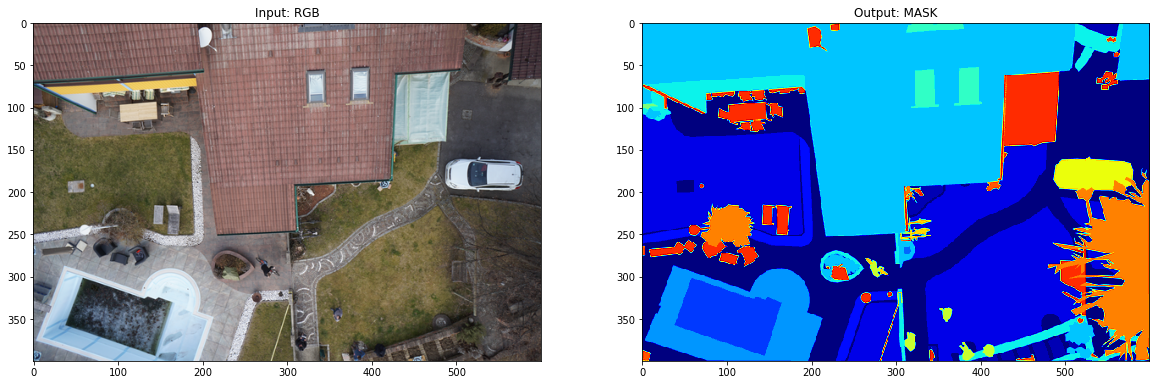

2021/03/28 20:24:20-INFO - Save imagepair at reports/figures/image_pair_gray.png


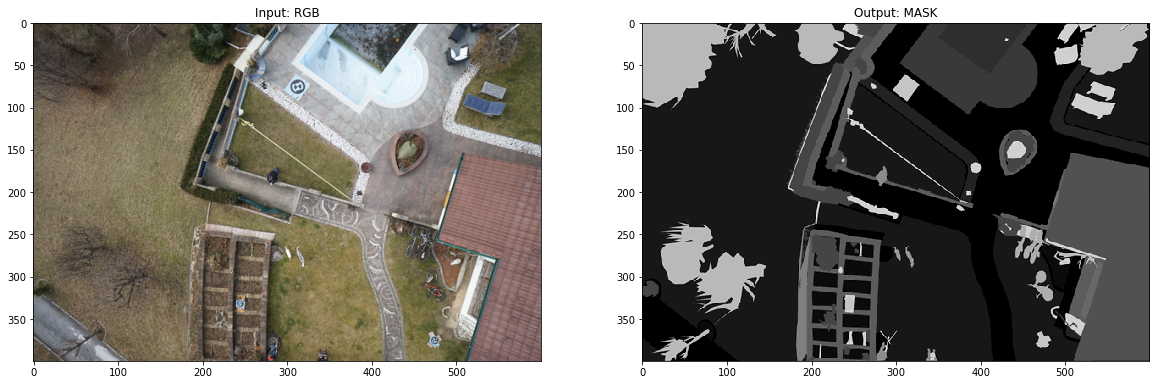

2021/03/28 20:24:22-INFO - Save imagepair at reports/figures/image_pair_jet.png


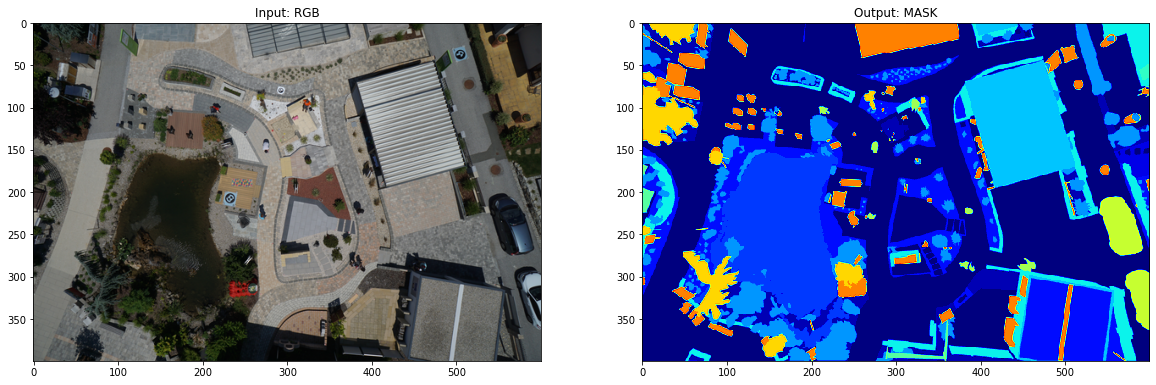

In [19]:
from SegNet.data.dataset import BasicDataset
from torch.utils.data import DataLoader
from PIL import Image
import numpy as np

df_train_small = df_train.head(6) 
# df_valid_small = df_valid.head(10)
data_train = BasicDataset(df_train_small , scale = 0.1)
# data_valid = BasicDataset(df_valid_small , scale = 0.1 )  

train_loader = DataLoader(
        data_train, batch_size=3, shuffle=True, num_workers=0, pin_memory=True)
for batch in train_loader:
    imgs = batch['image']
    true_masks = batch['mask']

def check_batch(batch_idx = 0, cmap = 'jet'):
    img = imgs[batch_idx,:,:,:]
    mask = true_masks[batch_idx,:,:,:]
    img = img.squeeze(0).numpy().transpose((1, 2, 0))
    mask = mask.squeeze().numpy()
    # img.shape, img.max(), img.min(), img.dtype
    # mask.shape, mask.max(), mask.min(), mask.dtype
    pil_img = Image.fromarray((img * 255).astype(np.uint8))
    pil_mask = Image.fromarray((mask).astype(np.uint8))
    plot_image_pair(pil_img, pil_mask, label_names, cmap=cmap)

check_batch(batch_idx = 0)
check_batch(batch_idx = 1, cmap ='gray')
check_batch(batch_idx = 2)

In [20]:
%%bash
python model_train.py -h

usage: model_train.py [-h] [-e E] [-b [B]] [-l [LR]] [-f LOAD] [-s SCALE]

Train the UNet on images and target masks

optional arguments:
  -h, --help            show this help message and exit
  -e E, --epochs E      Number of epochs (default: 2)
  -b [B], --batch-size [B]
                        Batch size (default: 2)
  -l [LR], --learning-rate [LR]
                        Learning rate (default: 0.01)
  -f LOAD, --load LOAD  Load model from a .pth file (default: False)
  -s SCALE, --scale SCALE
                        Downscaling factor of the images (default: 0.1)


In [21]:
%%bash
## Trainig Cost Very Long Time.
# python model_train.py -f checkpoints/CP_epoch2.pth
# python model_train.py -f checkpoints/CP_epoch2.pth -b 4 -e 200 -s 0.1
#  python model_train.py -f checkpoints/CP_epoch2.pth -b 4 -e 10 -s 0.1

## Manage Model

In [22]:
%%bash
# Training records 
ls checkpoints
# copy the best one to your models folder: cp source target  
# or Use `MLflow` to Automatic the model management 
# cp checkpoints/xxxx.pth models 
ls models

CP_epoch1.pth
CP_epoch10.pth
CP_epoch2.pth
CP_epoch3.pth
CP_epoch4.pth
CP_epoch5.pth
CP_epoch6.pth
CP_epoch7.pth
CP_epoch8.pth
CP_epoch9.pth


## Prediction 

In [23]:
%%bash
python model_predict.py -h

usage: model_predict.py [-h] [--model FILE] [--input INPUT [INPUT ...]]
                        [--output INPUT [INPUT ...]] [--viz] [--nosave]
                        [--maskthreshold MASKTHRESHOLD] [--scale SCALE]

Predict masks from input images

optional arguments:
  -h, --help            show this help message and exit
  --model FILE, -m FILE
                        Specify the file in which the model is stored
                        (default: MODEL.pth)
  --input INPUT [INPUT ...], -i INPUT [INPUT ...]
                        filenames of input images (default: None)
  --output INPUT [INPUT ...], -o INPUT [INPUT ...]
                        Filenames of ouput images (default: None)
  --viz, -v             Visualize the images as they are processed (default:
                        False)
  --nosave, -n          Do not save the output masks (default: False)
  --maskthreshold MASKTHRESHOLD, -t MASKTHRESHOLD
                        Minimum probability value to consider a mask pixel

### Use the source code 

2021/03/28 20:24:31-INFO - Save imagepair at reports/predict/image_pair_jet.png


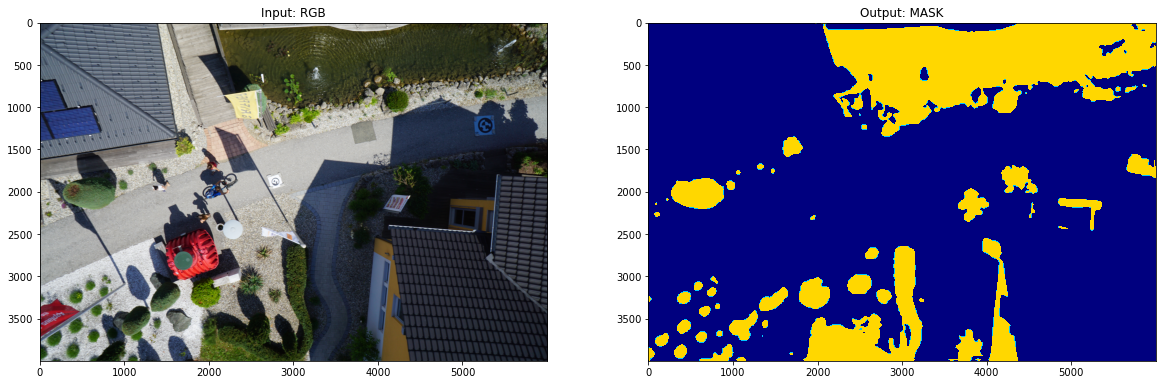

2021/03/28 20:24:40-INFO - Save imageoverlay at reports/predict/sample.png


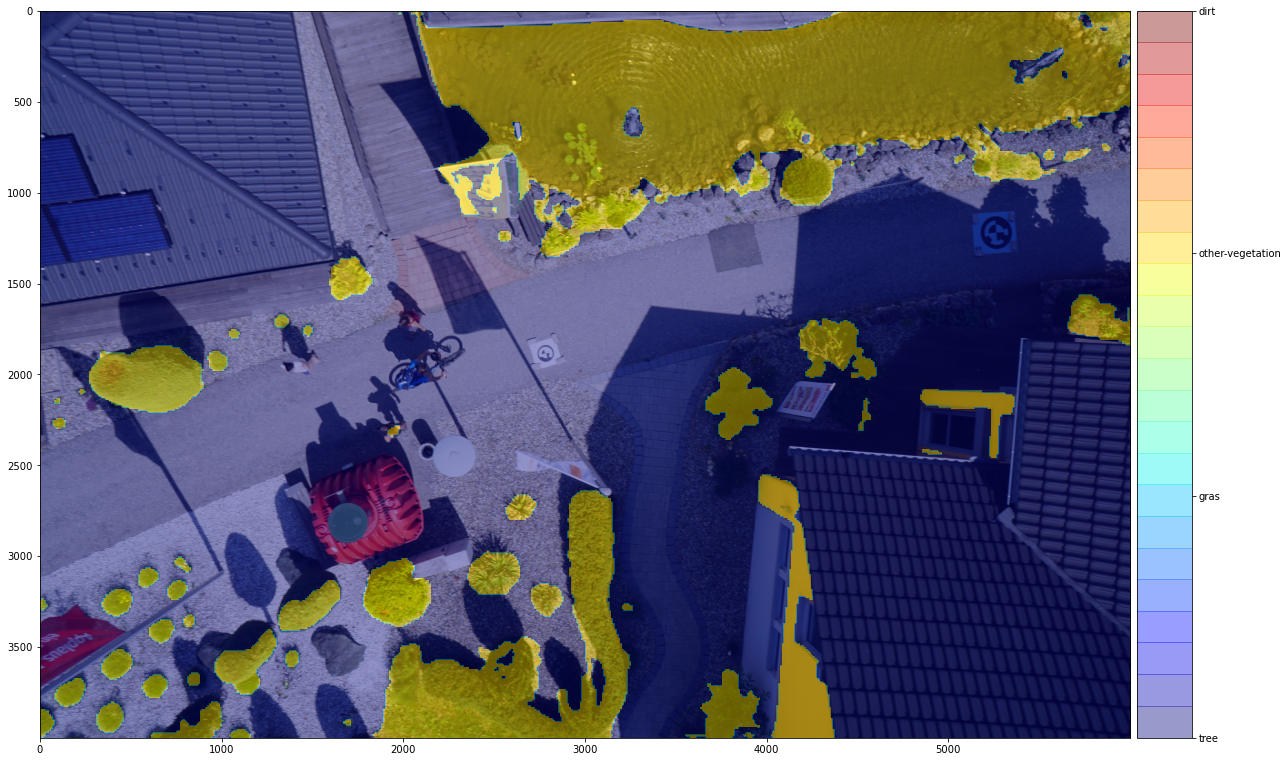

'reports/predict/sample.png'

In [24]:
from model_predict import *
input = "data/raw/train/images/382.jpg"
output = "output.png"
n_classes = len(label_names)
net = UNetSmall(n_channels=3, n_classes=n_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device=device)
net.load_state_dict(torch.load("checkpoints/CP_epoch10.pth", map_location=device))
img = Image.open(input)
mask = predict_img(net=net,
                   full_img=img,
                   scale_factor=0.1,
                   device=device)
result = mask_to_image(mask, 0.1)
plot_image_pair(img, result, label_names, cmap='jet', save_dir = "reports/predict")
plot_imageoverlay(img, result, label_names, cmap='jet', save_dir = "reports/predict")

In [25]:
label_ids = list(np.unique(mask))
for label_id in label_ids:
    print(f"{label_id} : {label_names[label_id]}")

0 : tree
2 : other-vegetation


### Use Command Line

In [26]:
%%bash
python model_predict.py -i data/raw/train/images/382.jpg -o output_test.png -m checkpoints/CP_epoch10.pth -s 0.1 -v

Figure(2000x1000)
Figure(1800x1200)


2021/03/28 20:24:44-INFO - Starting Predict:
        model:          checkpoints/CP_epoch10.pth
        input:          ['data/raw/train/images/382.jpg']
        output:         ['output_test.png']
        viz:            True
        nosave:        False
        maskthreshold: 0.5
        scale:          0.1
    
2021/03/28 20:24:44-INFO - Loading model checkpoints/CP_epoch10.pth
2021/03/28 20:24:44-INFO - Using device cpu
2021/03/28 20:24:44-INFO - Model loaded !
2021/03/28 20:24:44-INFO - 
Predicting image data/raw/train/images/382.jpg ...
2021/03/28 20:24:47-INFO - Mask saved to output_test.png
2021/03/28 20:24:47-INFO - Visualizing results for image data/raw/train/images/382.jpg, close to continue ...
2021/03/28 20:24:51-INFO - Save imagepair at reports/predict/image_pair_jet.png
2021/03/28 20:24:58-INFO - Save imageoverlay at reports/predict/sample.png


**Read the ImagePair from the path**

![Sample](reports/predict/image_pair_jet.png)

![Sample](reports/predict/sample.png)
 

## Next Step

- Unit Tests
- Error Analysis
- Update model structure and feature modules
- etc.